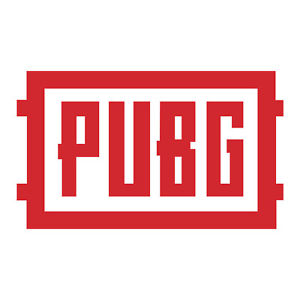

# <font color=blue>Players Unknown Battleground Capstone Project 1 </font>
### Objective: Analyze the variables highly correlated with winning a match
    
This notebook contains my first steps in uploading the data for cleaning and high level analysis

In [1]:
import pandas as pd
import numpy as np

In [24]:
a = pd.read_csv('agg_match_stats_0.csv', nrows=6000)
b = pd.read_csv('agg_match_stats_1.csv', nrows=6000)
c = pd.read_csv('agg_match_stats_2.csv', nrows=6000)
d = pd.read_csv('agg_match_stats_3.csv', nrows=6000)
e = pd.read_csv('agg_match_stats_4.csv', nrows=6000)


In [38]:
f = pd.read_csv('agg_match_stats_0.csv')

In [3]:
a.shape
#Sanity check

(6000, 15)

In [30]:
a = a[['player_dist_walk', 'player_dmg', 'team_placement', 'player_dist_ride', 'player_survive_time', 'game_size', 'party_size', 'player_kills']]
b = b[['player_dist_walk', 'player_dmg', 'team_placement', 'player_dist_ride', 'player_survive_time', 'game_size', 'party_size', 'player_kills']]
c = c[['player_dist_walk', 'player_dmg', 'team_placement', 'player_dist_ride', 'player_survive_time', 'game_size', 'party_size', 'player_kills']]
d = d[['player_dist_walk', 'player_dmg', 'team_placement', 'player_dist_ride', 'player_survive_time', 'game_size', 'party_size', 'player_kills']]
e = e[['player_dist_walk', 'player_dmg', 'team_placement', 'player_dist_ride', 'player_survive_time', 'game_size', 'party_size', 'player_kills']]

#Reduced the datasets to only the columns of interest. Did them individually because concating first took too much memory originally.

In [31]:
df = pd.concat([a, b, c, d, e], ignore_index=True) #concat the datasets into one
df.shape

(30000, 8)

In [32]:
df.describe() #Must try and figure out the unit of time in player_survive_time

,player_dist_walk,player_dmg,team_placement,player_dist_ride,player_survive_time,game_size,party_size,player_kills
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1280.753552,124.498600,23.686400,1170.505562,786.328472,45.676133,2.846333,0.885167
std,4606.184499,170.818334,20.212021,1980.748483,578.099957,25.478699,1.261443,1.566374
min,0.000000,0.000000,1.000000,0.000000,61.914000,13.000000,1.000000,0.000000
25%,205.943852,0.000000,9.000000,0.000000,247.080750,27.000000,2.000000,0.000000
50%,836.330885,78.000000,19.000000,0.000000,645.712500,29.000000,4.000000,0.000000
75%,2045.518065,176.000000,29.000000,1939.241667,1295.607000,50.000000,4.000000,1.000000
max,712870.563000,3956.000000,99.000000,100982.023000,2213.356000,99.000000,4.000000,42.000000


In [7]:
df = df[(df['player_dist_walk'] > 5)] 
df = df[(df['player_survive_time'] > 10)]

# Reduced the dataset to players that walked at least 5 meters
# Players that didnt manage to move are not worth analysis and were likely afk
# Player survival time seems to be measured by seconds 

In [8]:
df['player_survive_time'] = df['player_survive_time'] // 60 
#divide the time by 60 to convert them from seconds into minutes rounded.

In [9]:
df.party_size = df.party_size.astype('category') #Reduce memory usage

In [10]:
df_solo = df[(df['party_size'] == 1)]
df_duo = df[(df['party_size'] == 2)]
df_squad = df[(df['party_size'] == 4)]

#created seperate dataframes for solo, duo, and squad game modes respectively
#sorted datasets by how well they placed in a match

**Players Unknown Battleground has 3 party mode types: Solo, Duo, and Squad. It will be worth noting if we see suprising differences between game modes**

In [11]:
df_solo.party_size.value_counts(dropna=False) #inspecting calculations worked correctly 

1    5931
4       0
2       0
Name: party_size, dtype: int64

In [12]:
df_solo = df_solo[(df_solo['team_placement'] <= 50)].set_index('team_placement').sort_values('team_placement')
df_duo = df_duo[(df_duo['team_placement'] <= 25)].set_index('team_placement').sort_values('team_placement')
df_squad = df_squad[df_squad['team_placement'] <= 13].set_index('team_placement').sort_values('team_placement')


**Only interested in top half of players in a match. In a typical match the first half of teams die off in just a few minutes. This is more based off of luck of how / where you land, as well as shooting skills. For this analysis I'm am more interested in the long term variables of a match to see if a strategy can be determined / if there is a strong correlation with certain variables and winning fist place.**

In [13]:
df_solo.head() #Inspecting results

,player_dist_walk,player_dmg,player_dist_ride,player_survive_time,game_size,party_size,player_kills
team_placement,,,,,,,
1,1734.04260,616,989.995700,31.0,97,1,7
1,5994.73633,508,5066.445310,36.0,97,1,5
1,4062.22339,488,2261.395260,34.0,92,1,4
1,5152.94000,492,0.000000,32.0,81,1,5
1,4538.55300,577,5.191877,29.0,95,1,3


In [14]:
df_solo.describe()

,player_dist_walk,player_dmg,player_dist_ride,player_survive_time,game_size,player_kills
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,2110.875000,169.138571,1726.992865,18.277451,91.781008,1.409217
std,12551.506433,208.667252,2727.340501,7.189921,7.485815,2.034176
min,32.661670,0.000000,0.000000,2.000000,58.000000,0.000000
25%,1054.521120,25.000000,0.000000,12.000000,91.000000,0.000000
50%,1686.188720,108.000000,926.895900,18.000000,94.000000,1.000000
75%,2585.131840,233.000000,2818.536130,24.000000,96.000000,2.000000
max,712870.563000,3401.000000,100982.023000,36.000000,99.000000,36.000000


In [15]:
df_duo.describe()

,player_dist_walk,player_dmg,player_dist_ride,player_survive_time,game_size,player_kills
count,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000
mean,2034.332371,180.631350,2148.764700,19.858732,46.648283,1.352201
std,1089.359719,200.554873,2217.866696,7.694498,4.164376,1.853789
min,5.058827,0.000000,0.000000,1.000000,31.000000,0.000000
25%,1266.485505,36.000000,0.000000,14.000000,46.000000,0.000000
50%,1933.588650,120.000000,1627.217345,21.000000,48.000000,1.000000
75%,2690.428710,253.000000,3586.614928,26.000000,49.000000,2.000000
max,8706.597000,2139.000000,14965.415000,36.000000,50.000000,19.000000


In [16]:
df_squad.describe()

,player_dist_walk,player_dmg,player_dist_ride,player_survive_time,game_size,player_kills
count,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000
mean,2166.486343,176.224215,2237.186020,20.417670,26.623691,1.262827
std,1209.522845,214.881170,2190.332319,8.384638,2.255366,1.960009
min,5.164915,0.000000,0.000000,1.000000,13.000000,0.000000
25%,1321.044312,26.000000,0.000000,15.000000,26.000000,0.000000
50%,2151.575355,107.000000,1847.111085,22.000000,27.000000,1.000000
75%,2956.039192,247.000000,3659.480715,27.000000,28.000000,2.000000
max,10131.579100,3956.000000,14799.857400,36.000000,32.000000,42.000000


In [17]:
df_squad.info() #Data types appear correct, no missing values seen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7640 entries, 1 to 13
Data columns (total 7 columns):
player_dist_walk       7640 non-null float64
player_dmg             7640 non-null int64
player_dist_ride       7640 non-null float64
player_survive_time    7640 non-null float64
game_size              7640 non-null int64
party_size             7640 non-null category
player_kills           7640 non-null int64
dtypes: category(1), float64(3), int64(3)
memory usage: 425.4 KB


In [41]:
df_solo.to_csv('dfsolo.csv', sep=',')
df_duo.to_csv('dfduo.csv', sep=',')
df_squad.to_csv('dfsquad.csv', sep=',')

In [44]:
#Created this larger data set to make a balanced dataset for my logistic regression 
#model in part 4, where the labels are first place, and not first place. 

extra_data = f[['player_dist_walk', 'player_dmg', 'team_placement', 'player_dist_ride', 
       'player_survive_time', 'game_size', 'party_size', 'player_kills']]
extra_data = f[(f['player_dist_walk'] > 5)] 
extra_data = f[(f['player_survive_time'] > 10)]
extra_data['player_survive_time'] = extra_data['player_survive_time'] // 60 
extra_data = extra_data[(extra_data['party_size'] == 1)]



C:\Users\Ameen\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
extra_data.to_csv('extra_data.csv', sep=',')
